In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('temp2/temp_5.csv')
df['v_pos'] = [0 if value < 0 else 1 for value in df.v_x.values] 
df.pH = [value if value < 15 else value / 10 for value in df.pH.values]
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['datetime', 'y', 'x', 'v_x', 'v_y', 'v_len', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'BGA', 'Chlorophyll', 'ODO', 'fDOM', 'pH',
       'vegetation', 'windspeed', 'winddir', 'visibility', 'cloudcover',
       'solarradiation', 'uvindex', 'conditions', 'v_pos'],
      dtype='object')


,datetime,y,x,v_x,v_y,v_len,s2n,corr,sun_altitude,sun_azimuth,...,pH,vegetation,windspeed,winddir,visibility,cloudcover,solarradiation,uvindex,conditions,v_pos
0,2024-04-10 13:38:23,9.645,0.155,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,8.73,none,3.5,349,9.9,0.0,942,9,Clear,1
1,2024-04-10 13:38:23,9.645,0.285,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,8.73,none,3.5,349,9.9,0.0,942,9,Clear,1
2,2024-04-10 13:38:23,9.645,0.415,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,8.73,none,3.5,349,9.9,0.0,942,9,Clear,1
3,2024-04-10 13:38:23,9.645,0.545,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,8.73,none,3.5,349,9.9,0.0,942,9,Clear,1
4,2024-04-10 13:38:23,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,8.73,none,3.5,349,9.9,0.0,942,9,Clear,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848991,2024-01-05 13:41:17,0.155,19.525,0.001230,0.010328,0.010401,3.14992,0.48536,0.414650,3.444309,...,8.38,none,5.8,57,1.2,100.0,133,1,"Snow, Rain, Overcast",1
6848992,2024-01-05 13:41:17,0.155,19.655,-0.006016,0.008699,0.010577,3.29048,0.50888,0.414650,3.444309,...,8.38,none,5.8,57,1.2,100.0,133,1,"Snow, Rain, Overcast",0
6848993,2024-01-05 13:41:17,0.155,19.785,0.007823,-0.004113,0.008838,3.18176,0.50664,0.414650,3.444309,...,8.38,none,5.8,57,1.2,100.0,133,1,"Snow, Rain, Overcast",1
6848994,2024-01-05 13:41:17,0.155,19.915,-0.057642,-0.049512,0.075987,3.10912,0.49288,0.414650,3.444309,...,8.38,none,5.8,57,1.2,100.0,133,1,"Snow, Rain, Overcast",0


### Does the time of day effect the number of vectors present?

<Axes: xlabel='sun_altitude', ylabel='v_x'>

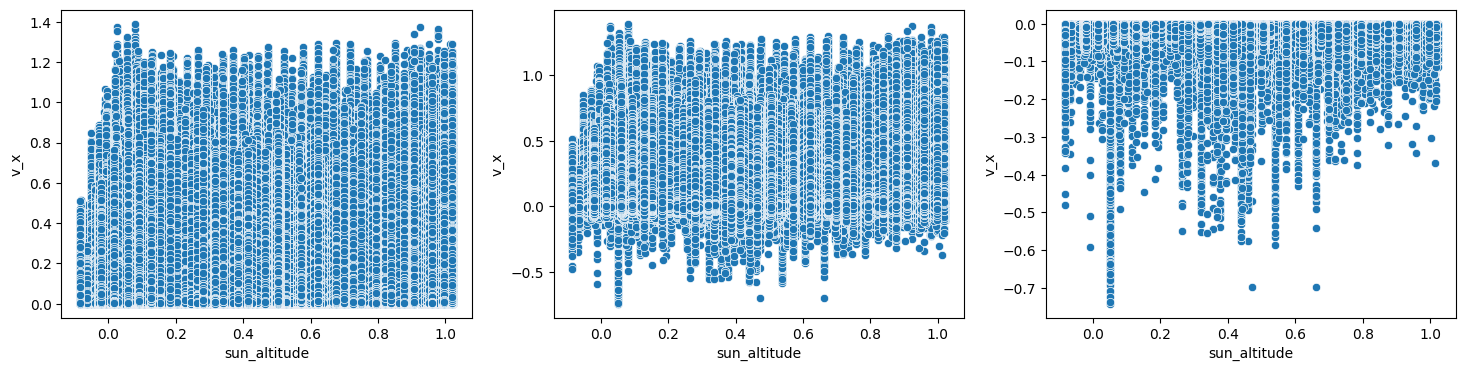

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.scatterplot(
    data=df[df.v_x >= 0],
    x='sun_altitude',
    y='v_x',
    ax=axes[0]
)

sns.scatterplot(
    data=df,
    x='sun_altitude',
    y='v_x',
    ax=axes[1]
)

sns.scatterplot(
    data=df[df.v_x < 0],
    x='sun_altitude',
    y='v_x',
    ax=axes[2]
)

<Axes: xlabel='sun_altitude', ylabel='v_len'>

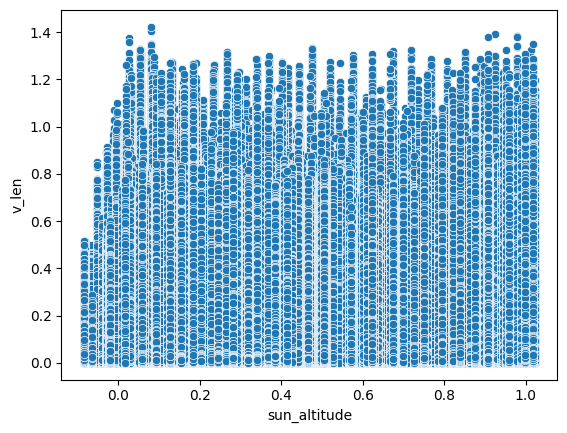

In [4]:
sns.scatterplot(
    data=df,
    x='sun_altitude',
    y='v_len'
)

In [5]:
df[df.sun_altitude < 0]
df.columns

Index(['datetime', 'y', 'x', 'v_x', 'v_y', 'v_len', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'BGA', 'Chlorophyll', 'ODO', 'fDOM', 'pH',
       'vegetation', 'windspeed', 'winddir', 'visibility', 'cloudcover',
       'solarradiation', 'uvindex', 'conditions', 'v_pos'],
      dtype='object')

<Axes: xlabel='visibility', ylabel='Count'>

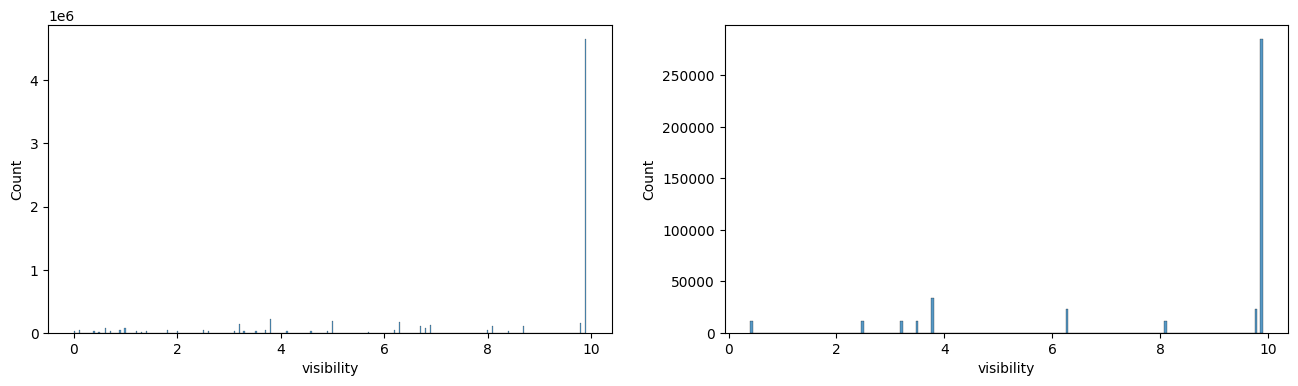

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

var = 'visibility'

sns.histplot(
    data=df,
    x=var,
    ax=axes[0]
)

sns.histplot(
    data=df[df.sun_altitude < 0],
    x=var,
    ax=axes[1]
)

<Axes: xlabel='uvindex', ylabel='Count'>

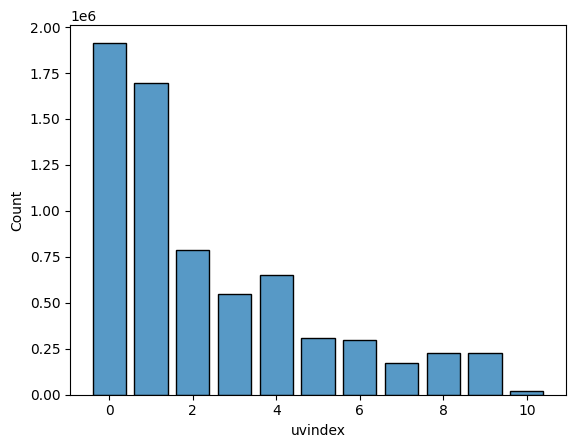

In [7]:
sns.histplot(
    # data=df[df.sun_altitude < 0],
    data=df,
    x='uvindex',
    discrete=True,
    shrink=0.8
)

<Axes: xlabel='sun_altitude', ylabel='v_x'>

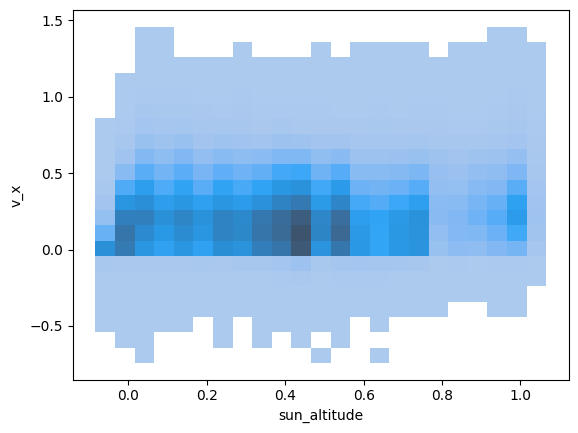

In [8]:
sns.histplot(
    data=df,
    x='sun_altitude',
    y='v_x',
    binwidth=[0.05, 0.1]
)

<Axes: xlabel='v_x', ylabel='Count'>

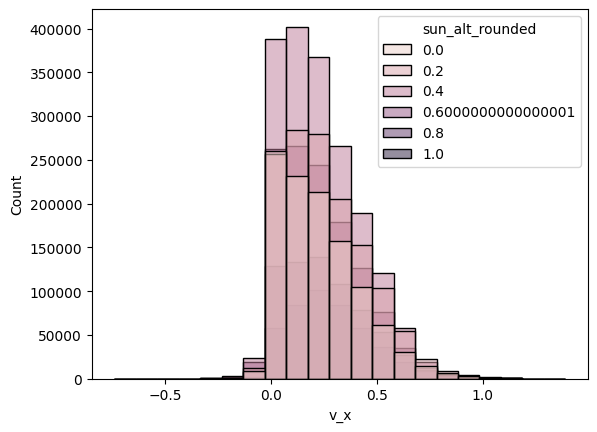

In [9]:
df2 = df.copy()
df2['sun_alt_rounded'] = 0.2 * round(df.sun_altitude / 0.2)

sns.histplot(
    data=df2,
    x='v_x',
    hue='sun_alt_rounded',
    binwidth=0.1
)

<Axes: xlabel='sun_altitude', ylabel='Count'>

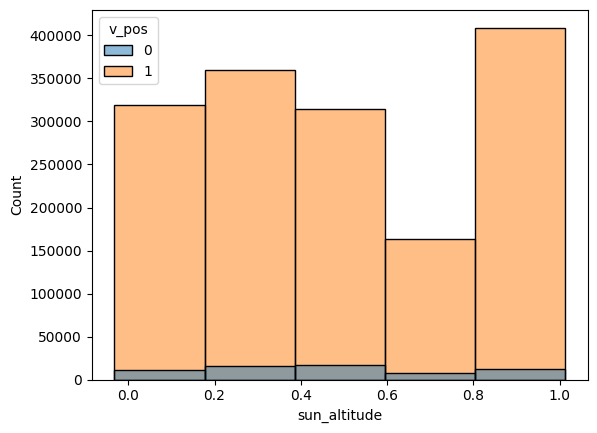

In [10]:
sns.histplot(
    data=df[df.cloudcover == 0],
    x='sun_altitude',
    hue='v_pos',
    bins=5
)

<Axes: xlabel='sun_altitude', ylabel='v_x'>

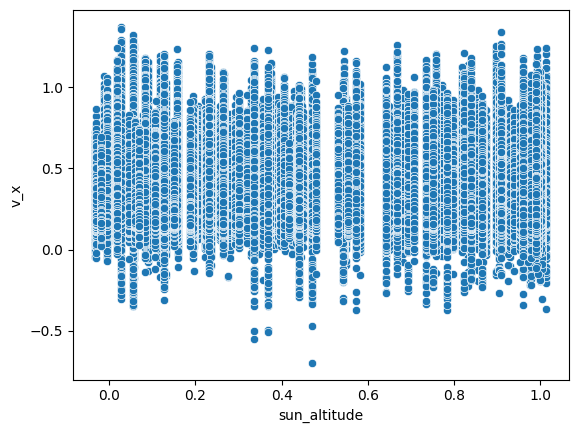

In [11]:
sns.scatterplot(
    # data=df[(df.cloudcover == 0)&(df.v_x >= 0)&(df.v_len >= 0.15)],
    data=df[(df.cloudcover == 0)&(df.v_len >= 0.15)],
    x='sun_altitude',
    y='v_x',
)

### Does the cloudcover effect the number of vectors present?

<Axes: xlabel='cloudcover', ylabel='v_x'>

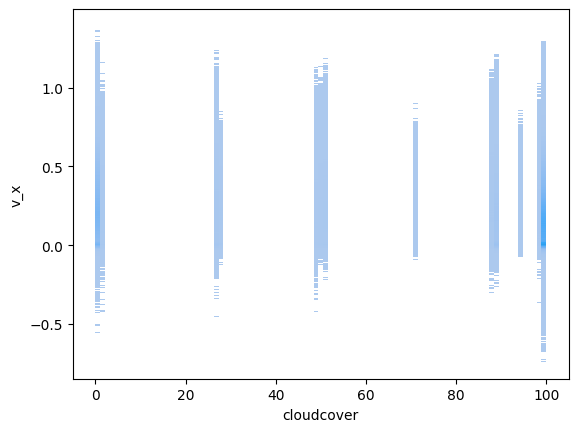

In [12]:
sns.histplot(
    data=df,
    x='cloudcover',
    y='v_x'
)

<Axes: xlabel='cloudcover', ylabel='v_len'>

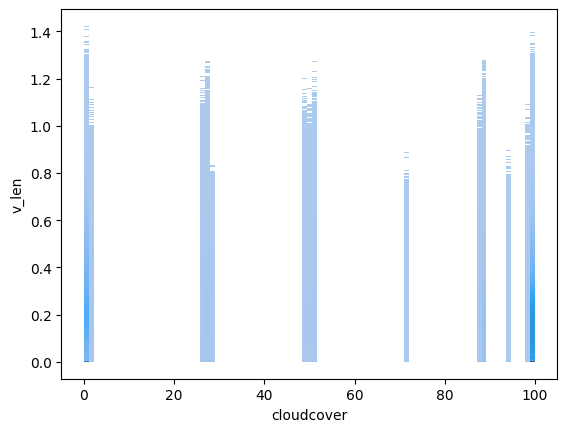

In [13]:
sns.histplot(
    data=df[df.v_x >= 0],
    x='cloudcover',
    y='v_len'
)

In [ ]:
df[df.cloudcover == 0]

Does wind speed correlate with the length of vectors?

<Axes: xlabel='v_len', ylabel='Count'>

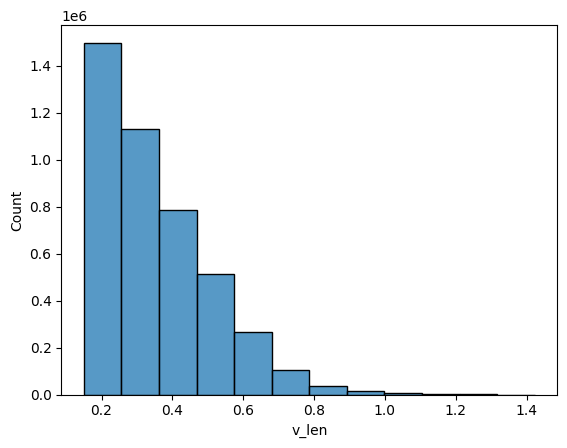

In [14]:
sns.histplot(
    data=df[df.v_len >= 0.15],
    x='v_len',
    bins=12
)

In [ ]:
df[df.v_len < 0.01]

Index(['datetime', 'y', 'x', 'v_x', 'v_y', 'v_len', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'BGA', 'Chlorophyll', 'ODO', 'fDOM', 'pH',
       'vegetation', 'windspeed', 'winddir', 'visibility', 'cloudcover',
       'solarradiation', 'uvindex', 'conditions', 'v_pos'],
      dtype='object')

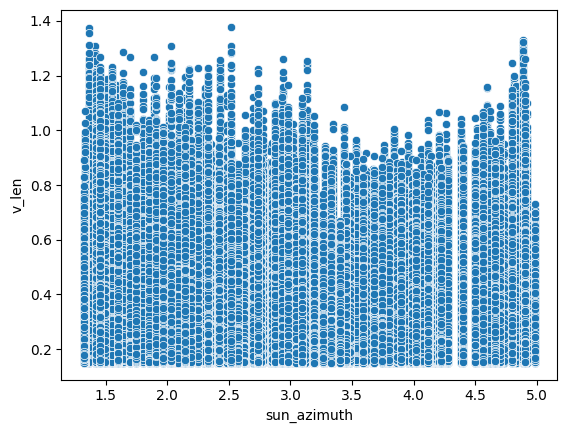

In [15]:
sns.scatterplot(
    data=df[(df.cloudcover == 0)&(df.v_x >= 0)&(df.v_len >= 0.15)],
    x='sun_azimuth',
    y='v_len'
)
df.columns

<Axes: xlabel='cloudcover', ylabel='v_len'>

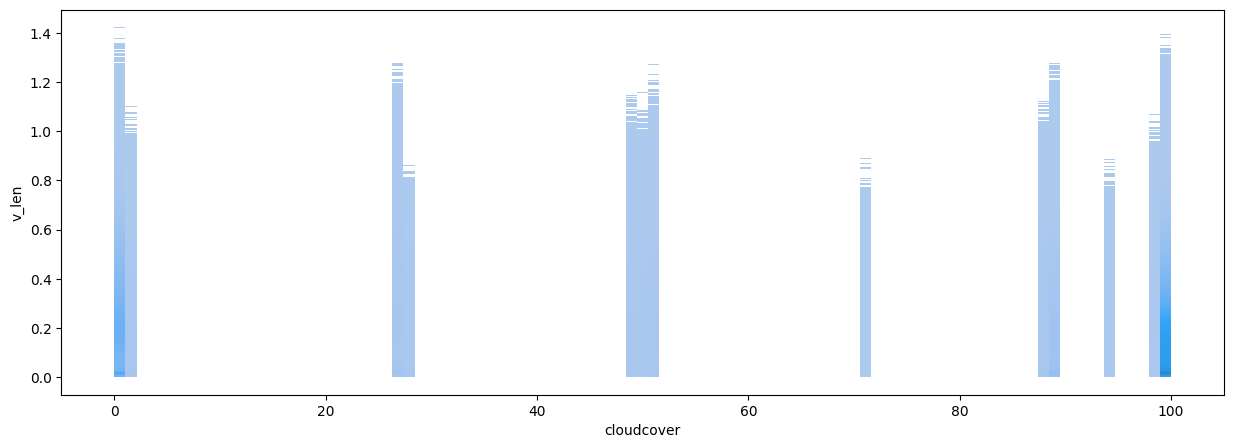

In [16]:
plt.figure(figsize=(15, 5))

sns.histplot(
    data=df,
    x='cloudcover',
    y='v_len',
    # shrink=0.8
)

In [ ]:
df.columns

<Axes: xlabel='pH', ylabel='v_x'>

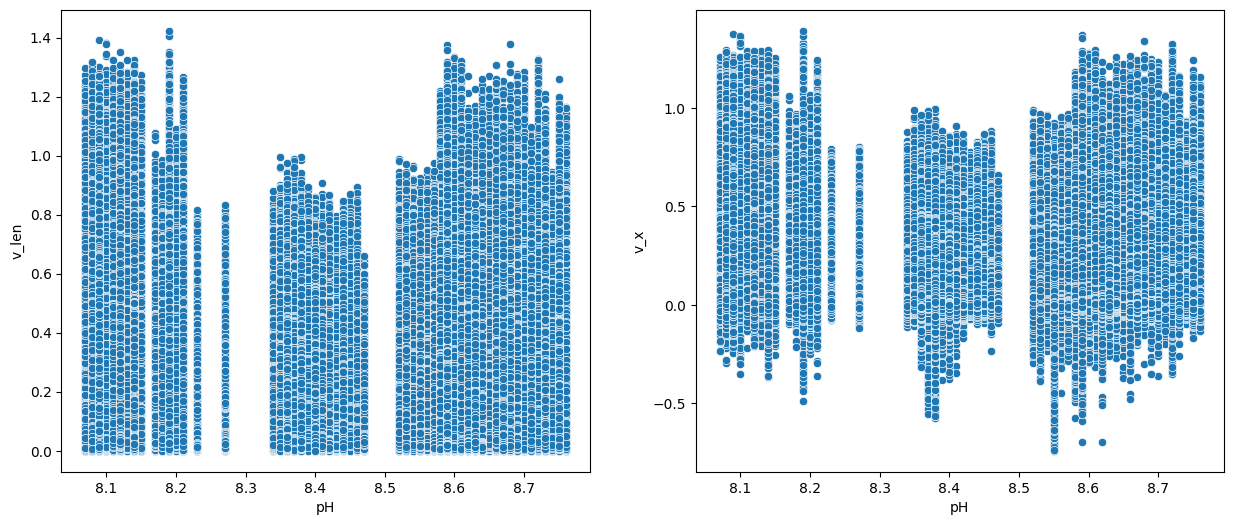

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(
    data=df,
    x='pH',
    y='v_len',
    ax=axes[0]
)

sns.scatterplot(
    data=df,
    x='pH',
    y='v_x',
    ax=axes[1]
)

<Axes: xlabel='datetime', ylabel='v_len'>

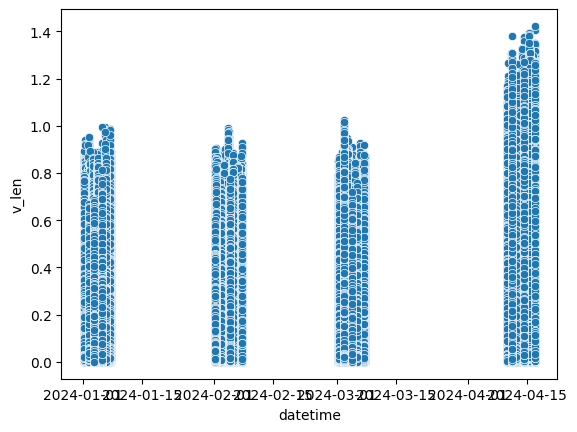

In [4]:
sns.scatterplot(
    data=df,
    x='datetime',
    y='v_len',
    # line_kws={'color': 'red'}
)

<Axes: xlabel='v_pos', ylabel='Count'>

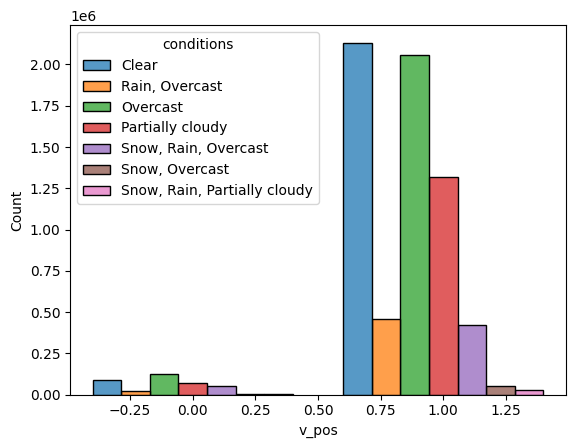

In [5]:
df['v_pos'] = [0 if value < 0 else 1 for value in df.v_x.values] 

sns.histplot(
    data=df,
    x='v_pos',
    hue='conditions',
    discrete=True,
    shrink=0.8,
    multiple='dodge'
)

<Axes: xlabel='conditions', ylabel='Count'>

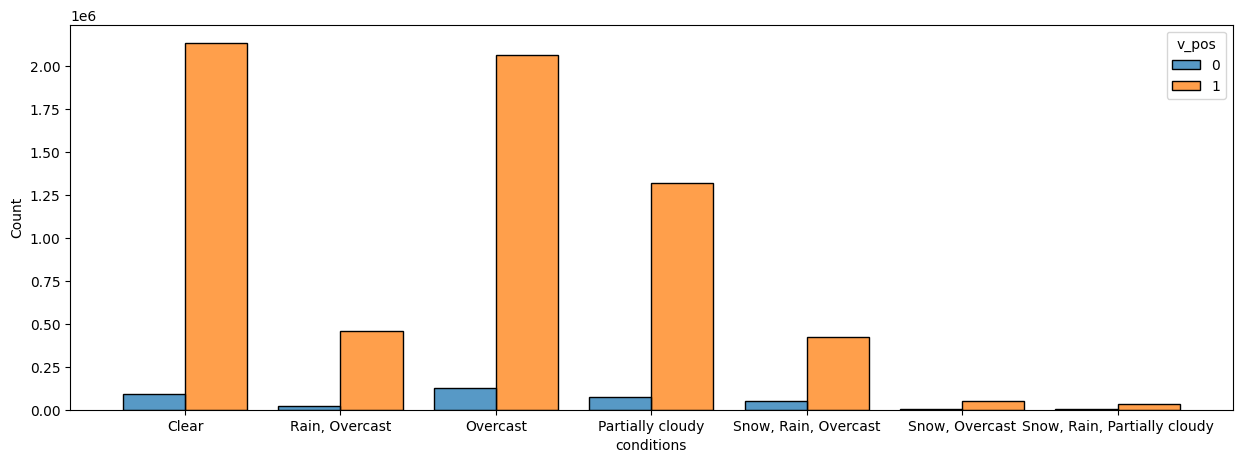

In [6]:
plt.figure(figsize=(15, 5))

sns.histplot(
    data=df,
    x='conditions',
    hue='v_pos',
    discrete=True,
    shrink=0.8,
    multiple='dodge'
)

<Axes: xlabel='uvindex', ylabel='Count'>

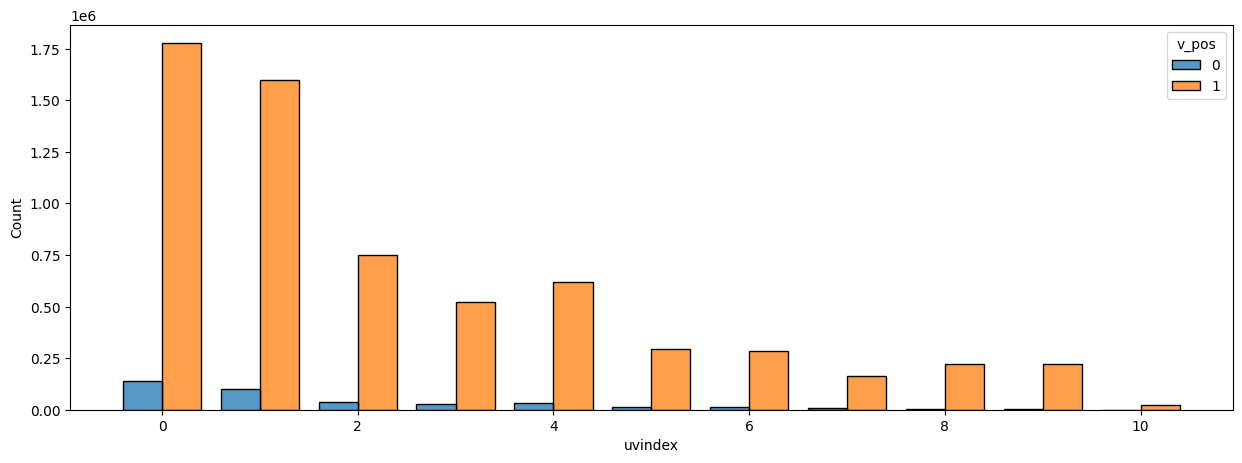

In [7]:
plt.figure(figsize=(15, 5))

sns.histplot(
    data=df,
    x='uvindex',
    hue='v_pos',
    discrete=True,
    shrink=0.8,
    multiple='dodge'
)

In [8]:
sns.regplot(
    data=df,
    x='LRO_discharge',
    y='v_len',
    line_kws={'color': 'red'},
)

KeyboardInterrupt: 

In [ ]:
sns.regplot(
    data=df,
    x='LRO_discharge',
    y='v_x',
    line_kws={'color': 'red'},
)